In [169]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [170]:
df = pd.read_csv("BinaryClassification.csv")


# data exploration

In [171]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   Sepal_length_in_cm  Sepal_width_in_cm  Petal_length_in_cm  \
0                 5.1                3.5                 1.4   
1                 4.9                3.0                 1.4   
2                 4.7                3.2                 1.3   
3                 4.6                3.1                 1.5   
4                 5.0                3.6                 1.4   

   Petal_width_in_cm      Species  
0                0.2  Iris-setosa  
1                0.2  Iris-setosa  
2                0.2  Iris-setosa  
3                0.2  Iris-setosa  
4                0.2  Iris-setosa  


In [172]:
# Display the basic information about the dataset (column names, non-null counts, data types)
print("\nBasic information about the dataset:")
print(df.info())


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sepal_length_in_cm  150 non-null    float64
 1   Sepal_width_in_cm   150 non-null    float64
 2   Petal_length_in_cm  150 non-null    float64
 3   Petal_width_in_cm   150 non-null    float64
 4   Species             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [173]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Sepal_length_in_cm    0
Sepal_width_in_cm     0
Petal_length_in_cm    0
Petal_width_in_cm     0
Species               0
dtype: int64


In [174]:
# Display the number of unique values per column
print("\nUnique values per column:")
print(df.nunique())
print(df["Species"].unique())



Unique values per column:
Sepal_length_in_cm    35
Sepal_width_in_cm     23
Petal_length_in_cm    43
Petal_width_in_cm     22
Species                2
dtype: int64
['Iris-setosa' 'Iris-virginica']


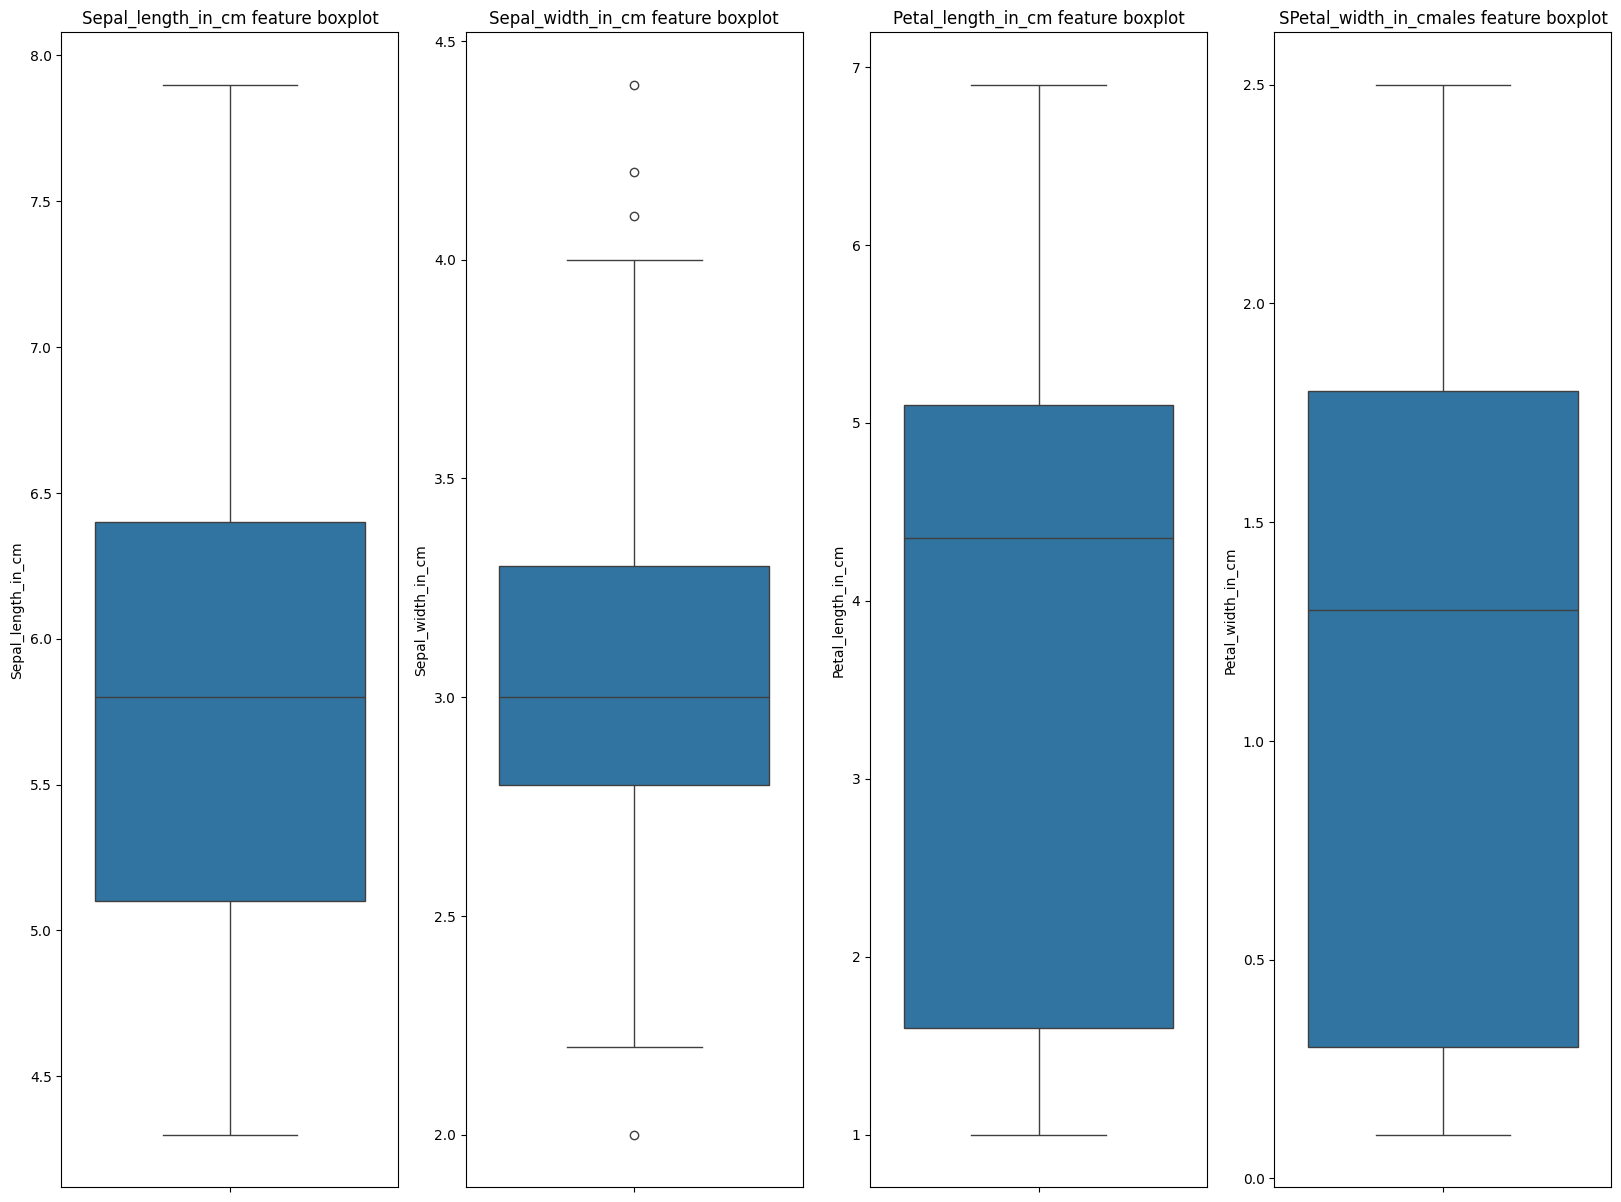

In [175]:
plt.figure(figsize=(20, 15))

#Subplot 1:
plt.subplot(1, 4, 1)
sns.boxplot(y='Sepal_length_in_cm' , data=df)
plt.title('Sepal_length_in_cm feature boxplot')

# Subplot 2: 
plt.subplot(1, 4, 2)
sns.boxplot(y='Sepal_width_in_cm' , data=df)
plt.title('Sepal_width_in_cm feature boxplot')

# Subplot 3: 
plt.subplot(1, 4, 3)
sns.boxplot(y='Petal_length_in_cm' , data=df)
plt.title('Petal_length_in_cm feature boxplot')

# Subplot 4:
plt.subplot(1, 4, 4) 
sns.boxplot(y='Petal_width_in_cm' , data=df)
plt.title('SPetal_width_in_cmales feature boxplot')

plt.show()

# logistic regression model

In [176]:
df["Species"]=df["Species"].astype('category').cat.codes

In [177]:
X=df.drop("Species", axis=1).values
y=df["Species"].values

In [178]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

In [180]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters found: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score: 0.8285714285714285


In [181]:
best_model = grid_search.best_estimator_

In [182]:
y_pred=best_model.predict(X_test)
score=best_model.score(X_test, y_test)

In [183]:
score

0.8222222222222222

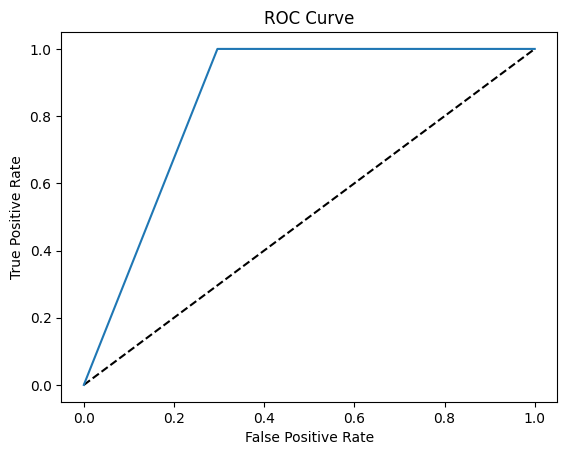

In [184]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], 'k--')
# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()